<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('../DLS/week_7/train.csv')

Посмотрим на 10 случайных строк из данных

In [5]:
data.sample(n = 10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1607,28,60.00,1682.05,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
1021,8,19.60,125,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2339,17,25.15,412.6,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
3778,33,54.60,1803.7,Male,1,No,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
1189,8,87.10,713.6,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
244,60,65.85,3928.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),0
967,11,35.65,425.1,Male,0,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,0
3567,72,89.10,6352.4,Female,1,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
1348,37,99.50,3762,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4736,9,66.25,620.55,Female,0,No,No,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Month-to-month,No,Mailed check,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

5282 строки, ненулевых нет. Данные в TotalSpent прочитались не как числовые, а как строковые, видимо там не всё является числом. Преобразуем в числовые данные.

In [9]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

In [10]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

9 строк в TotalSpent выпали в NaN, некритично, удалим их

In [11]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

Осталось 5273 строки

In [13]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'IsSeniorCitizen',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [15]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461,0.159681,0.262469
std,24.534723,30.177911,2269.014233,0.366345,0.440018
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.500000,401.100000,0.000000,0.000000
50%,29.000000,70.450000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'TotalSpent'}>,
        <AxesSubplot:title={'center':'IsSeniorCitizen'}>],
       [<AxesSubplot:title={'center':'Churn'}>, <AxesSubplot:>]],
      dtype=object)

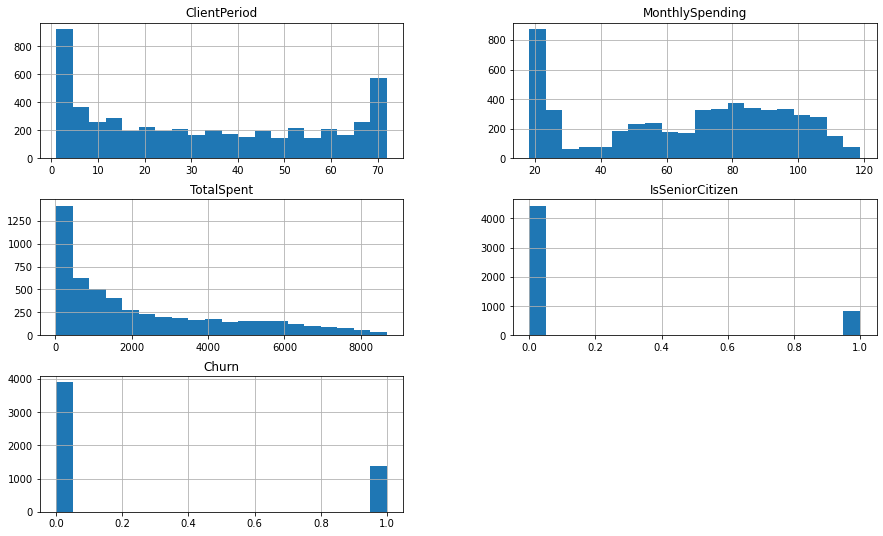

In [17]:
data.hist(figsize = (15, 9), bins = 20)

In [18]:
class_weight = data.Churn.value_counts(normalize = True).to_dict()
class_weight

{0: 0.7375308173715153, 1: 0.26246918262848473}

In [23]:
data.Churn.value_counts(normalize= True).to_dict()

{0: 0.7375308173715153, 1: 0.26246918262848473}

Видим гистограммы распределений числовых значений (3 из фич и одна таргет). Здесь же видим, что таргет несбалансирован: 74% класса 0 и 26% класса 1

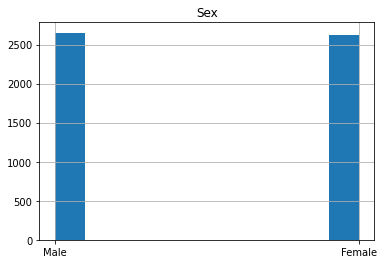

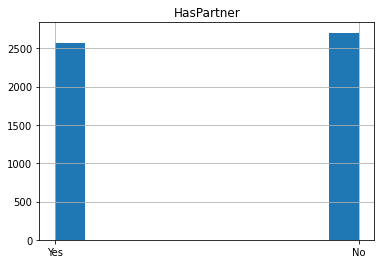

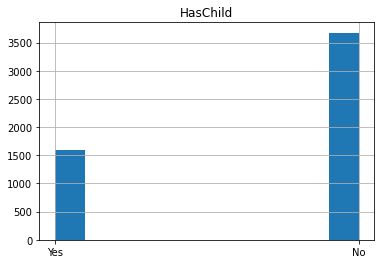

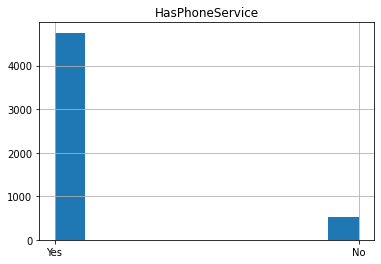

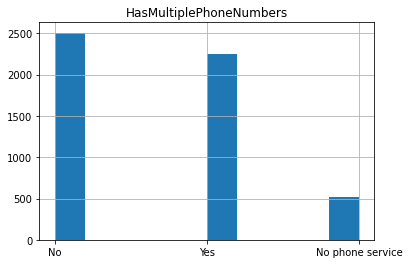

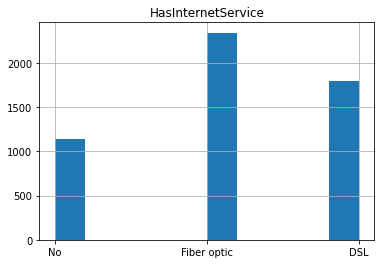

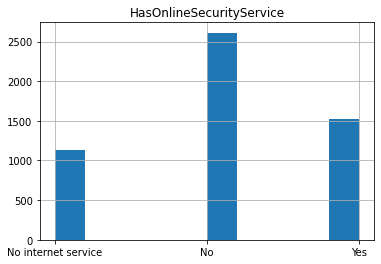

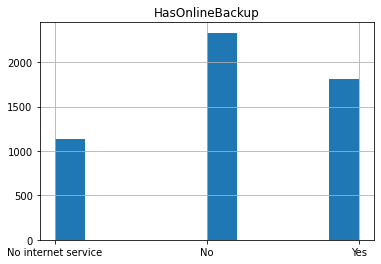

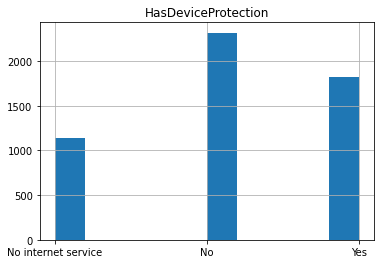

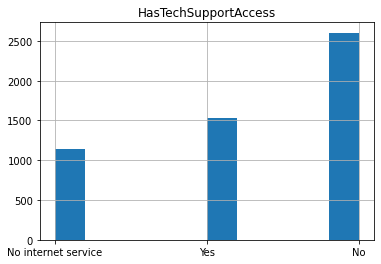

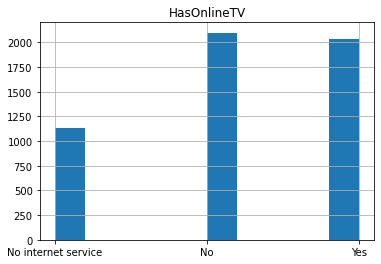

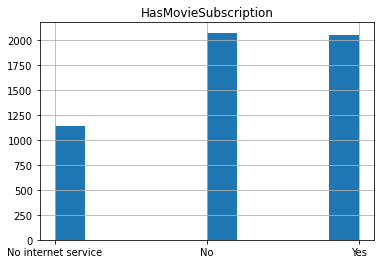

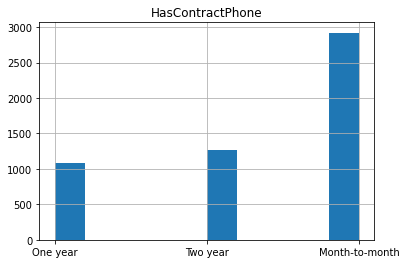

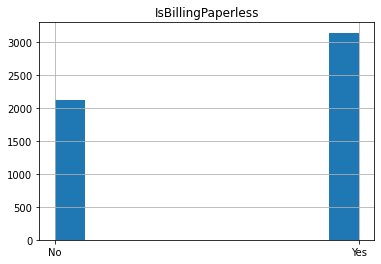

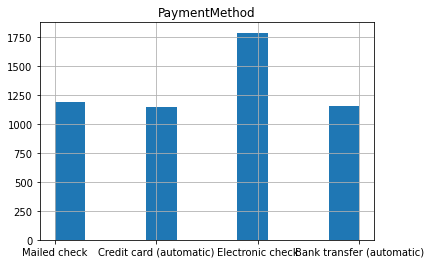

In [14]:
for col_name in cat_cols:
    data[col_name].hist()
    plt.title(col_name)
    plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [25]:
X = data.iloc[:,:-1]
y = data.Churn
X_orig = X

Категориальные данные преобразуем через OHE

In [26]:
X_cat = pd.get_dummies(X[cat_cols], drop_first = True)
X_num = X[num_cols]
X = pd.concat([X_cat, X_num], axis = 1)

Разобьем на train/test

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    random_state=11111)

In [28]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4218, 30), (1055, 30), (4218,), (1055,))

Отнормируем данные

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
compare_list = [] #Будем заносить метрику по моделям для итогового сравнения

In [39]:
lr_model = LogisticRegression(random_state=11111, class_weight=class_weight)
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict_proba(X_valid_scaled)[:, 1:]
roc_auc = roc_auc_score(y_valid, y_pred)
compare_list.append([type(lr_model).__name__, roc_auc])
roc_auc

0.8423562841530055

In [40]:
lrcv_model = LogisticRegressionCV(random_state=11111, refit=True, scoring='roc_auc', class_weight=class_weight)
lrcv_model.fit(X_train_scaled, y_train)
roc_auc = lrcv_model.score(X_valid_scaled, y_valid)
compare_list.append([type(lrcv_model).__name__, roc_auc])
roc_auc

0.8424918032786884

In [32]:
pd.DataFrame(compare_list, columns = ['model', 'ROC-AUC']).sort_values('ROC-AUC', ascending = False)

,model,ROC-AUC
1,LogisticRegressionCV,0.842492
0,LogisticRegression,0.842356


LogisticRegressionCV немного опередил младшего брата, обе модели побили baseline в 0,84

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
#!pip install catboost
from catboost import CatBoostClassifier

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X_orig, y, 
                                                    train_size=0.8,
                                                    random_state=11111)

In [35]:
catboost_model = CatBoostClassifier(cat_features=cat_cols, verbose = 0)

catboost_model.fit(X_train, y_train)

y_valid_predicted = catboost_model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_predicted)
compare_list.append([type(catboost_model).__name__+'_defualt', roc_auc])
roc_auc

0.8388896174863388

На дефолте 0,839. Запустим встроенный randomized_search

In [36]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'n_estimators': [200, 500, 1000, 2000]}

catboost_model_rand = CatBoostClassifier(cat_features=cat_cols, verbose = 0)
randomized_search_result = catboost_model_rand.randomized_search(grid, verbose=False, partition_random_seed = 11111,
                                                                 X=X_train,
                                                                 y=y_train,
                                                                 cv=5,
                                                                 search_by_train_test_split=False)

In [37]:
y_valid_predicted = catboost_model_rand.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_predicted)
compare_list.append([type(catboost_model_rand).__name__+'_randomized_search', roc_auc])
roc_auc

0.841663387978142

In [29]:
pd.DataFrame(compare_list, columns = ['model', 'ROC-AUC']).sort_values('ROC-AUC', ascending = False)

,model,ROC-AUC
1,LogisticRegressionCV,0.842492
0,LogisticRegression,0.842356
3,CatBoostClassifier_randomized_search,0.841239
2,CatBoostClassifier_defualt,0.838890


# Предсказания

In [42]:
best_model = lrcv_model

In [44]:
X_test = pd.read_csv('../DLS/week_7/test.csv')
X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors='coerce')
X_test.TotalSpent = X_test.TotalSpent.fillna(0)
X_test = pd.concat([pd.get_dummies(X_test[cat_cols], drop_first = True), X_test[num_cols]], axis = 1)
X_test = scaler.transform(X_test)

pred = best_model.predict_proba(X_test)[:, 1:]

submission = pd.read_csv('./submission.csv')

submission['Churn'] = pred
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.